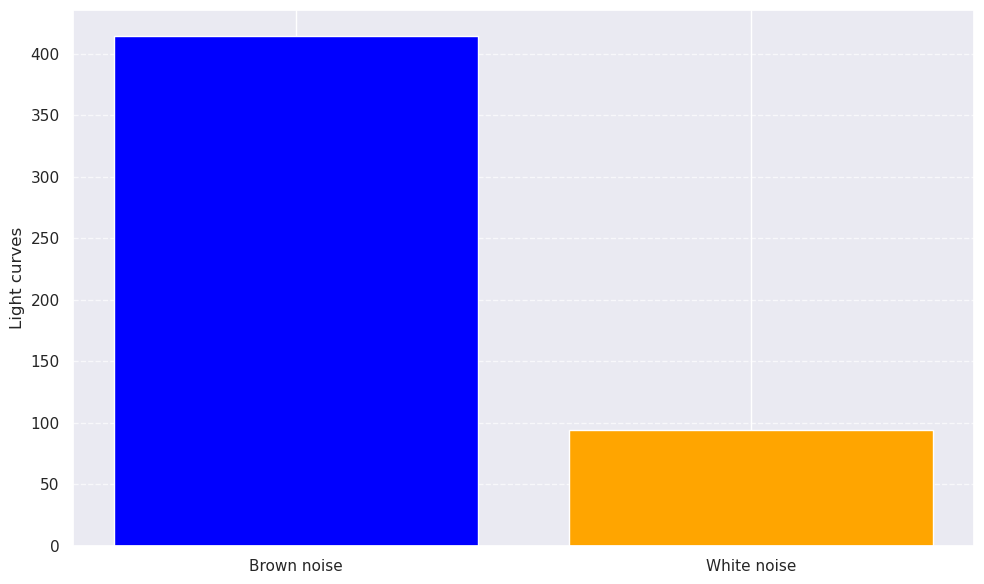


Detalles de las Series de Tiempo:
                Archivo  Pendiente Tipo de Ruido
0    sagA_453168001.dat     -0.108   White noise
1    sagA_452304001.dat     -0.465   White noise
2    sagA_451872001.dat     -1.381   Brown noise
3    sagA_451699201.dat     -1.545   Brown noise
4    sagA_451440001.dat     -1.550   Brown noise
..                  ...        ...           ...
514  sagA_378691201.dat     -1.497   Brown noise
515  sagA_378345601.dat     -1.578   Brown noise
516  sagA_377740801.dat     -1.668   Brown noise
517  sagA_377395201.dat     -1.432   Brown noise
518  sagA_376099201.dat     -1.504   Brown noise

[509 rows x 3 columns]


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Configuración de Seaborn
sns.set(style='darkgrid')

# Leer los resultados del análisis
def leer_resultados(archivo):
    resultados = pd.read_csv(archivo, sep='\t', header=0)
    return resultados

# Función para mapear los tipos de ruido
def mapear_ruido(resultados):
    # Diccionario de mapeo para traducir los tipos de ruido
    mapeo_ruido = {
        "Ruido marrón": "Brown noise",
        "Ruido blanco": "White noise"
    }
    # Aplicar el mapeo
    resultados['Tipo de Ruido'] = resultados['Tipo de Ruido'].map(mapeo_ruido)
    return resultados

# Función para visualizar los resultados
def visualizar_resultados(resultados):
    # Contar la cantidad de series por tipo de ruido
    conteo_tipos = resultados['Tipo de Ruido'].value_counts()

    # Crear un gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(conteo_tipos.index, conteo_tipos.values, color=['blue', 'orange'])
    plt.ylabel('Light curves')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Guardar el gráfico
    plt.savefig('images/color_analysis_noise_sample_1.png')
    plt.show()

    # Crear una tabla con los resultados
    print("\nDetalles de las Series de Tiempo:")
    print(resultados)

def main():
    # Leer resultados
    resultados = leer_resultados("analisis_color_ruido.txt")

    # Limpiar datos (remover filas con NaN si es necesario)
    resultados.dropna(inplace=True)

    # Mapear los tipos de ruido
    resultados = mapear_ruido(resultados)

    # Visualizar los resultados
    visualizar_resultados(resultados)

if __name__ == "__main__":
    main()


In [3]:
!tail analisis_color_ruido.txt

sagA_378345601.dat	-1.578	Ruido marrón
sagA_377740801.dat	-1.668	Ruido marrón
sagA_377395201.dat	-1.432	Ruido marrón
sagA_376099201.dat	-1.504	Ruido marrón

Resumen del Análisis:
Ruido blanco: 104 series
Ruido marrón: 415 series

Conclusión: La presencia de ruido no blanco en varias series sugiere que la periodicidad de 96 minutos podría ser una característica real de los datos, diferente de lo que se esperaría de ruido blanco.

# Barras apiladas de sample 1 y sample 2

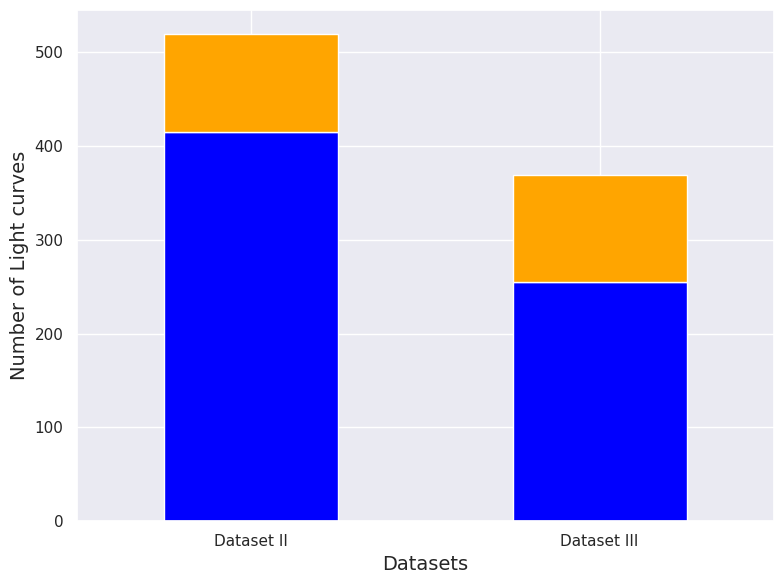

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Establecer el estilo de Seaborn
sns.set(style="darkgrid")

# Datos
data = {
    'Sample': ['Dataset II', 'Dataset II', 'Dataset III', 'Dataset III'],
    'Noise Color': ['White', 'Brown', 'White', 'Brown'],
    'Series Count': [104, 415, 114, 255]
}

# Crear un DataFrame a partir de los datos
df = pd.DataFrame(data)

# Crear una tabla pivote para que las categorías de ruido sean columnas
pivot_df = df.pivot(index='Sample', columns='Noise Color', values='Series Count')

# Graficar las barras apiladas con los colores azul y naranja, sin leyenda
pivot_df.plot(kind='bar', stacked=True, color=['blue', 'orange'], figsize=(8, 6), legend=False)

# Personalizar la gráfica
plt.xlabel('Datasets', fontsize=14)
plt.ylabel('Number of Light curves', fontsize=14)
plt.xticks(rotation=0)

# Guardar la gráfica en formato PNG
plt.tight_layout()
plt.savefig('images/series_by_noise_color.png', format='png', dpi=300)

# Mostrar la gráfica
plt.show()
